In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("housing.csv")

### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df = data.dropna()

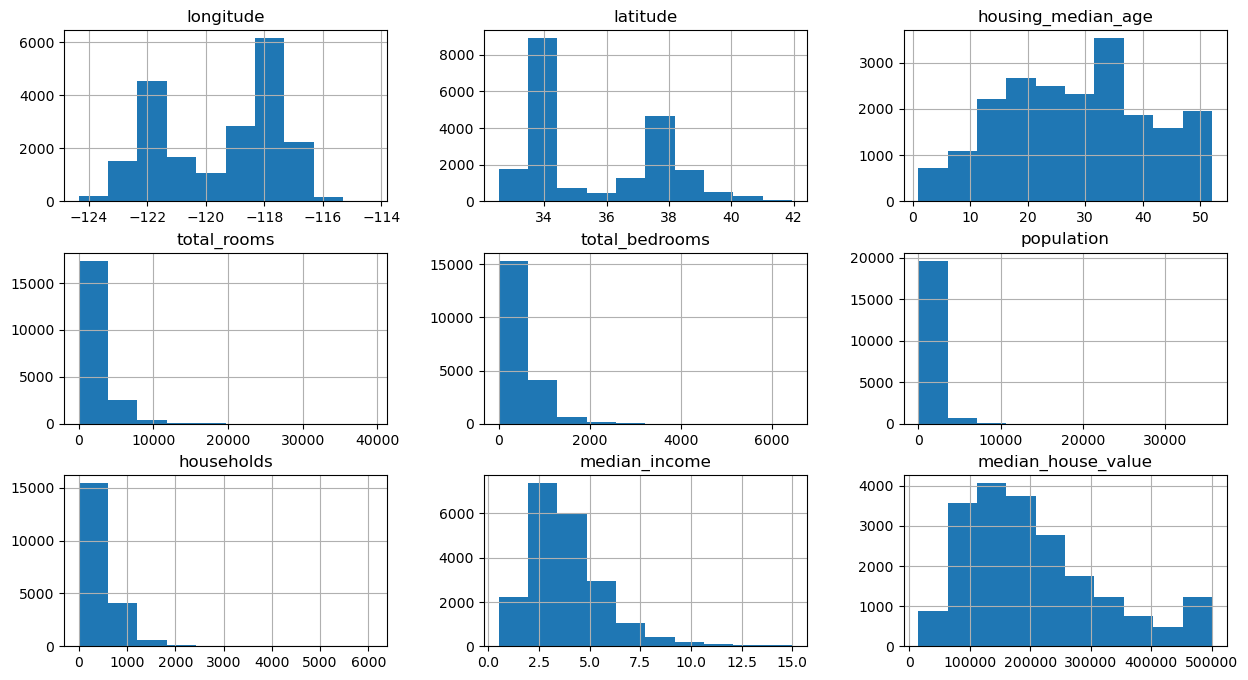

In [6]:
df.hist(figsize=(15, 8));

We can see that for total_bedrooms, total_rooms, population, and households, the data is skewed. We can use MinMax or some other type of scaling here.
We will use basic log

In [8]:
df.loc[:, 'total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df.loc[:, 'total_rooms'] = np.log(df['total_rooms'] + 1)
df.loc[:, 'population'] = np.log(df['population'] + 1)
df.loc[:, 'households'] = np.log(df['households'] + 1)

We added +1 to avoid logging 0 values

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.629543,6.054708,7.025121,5.984538,3.871162,206864.413155
std,2.003578,2.136348,12.591805,0.750260,0.726728,0.736336,0.726856,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,7.280008,5.693732,6.669498,5.638355,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,7.662938,6.077642,7.062192,6.016157,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,8.053251,6.473891,7.451822,6.405228,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,15.000100,500001.000000


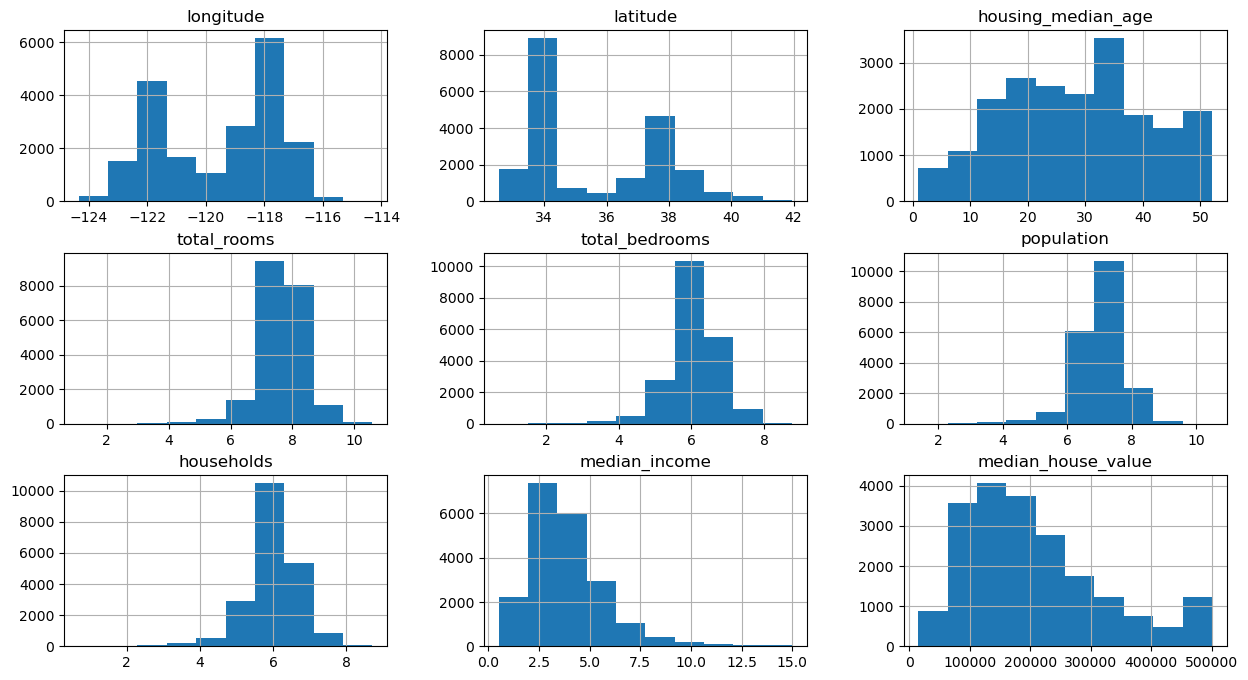

In [11]:
df.hist(figsize=(15, 8));

Now we can see a proper bell curve

##### Correlation Matrix between features

In [14]:
df_enc = pd.get_dummies(df, drop_first=True, dtype=int)
df_enc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,1,0


In [15]:
df_enc.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,-0.044914,-0.001902,-0.016793,0.016429
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_INLAND,-0.055337,0.351084,-0.236968,-0.012862,-0.044914,-0.071775,-0.087137,-0.237536,-0.484787,1.000000,-0.010681,-0.241356,-0.262289


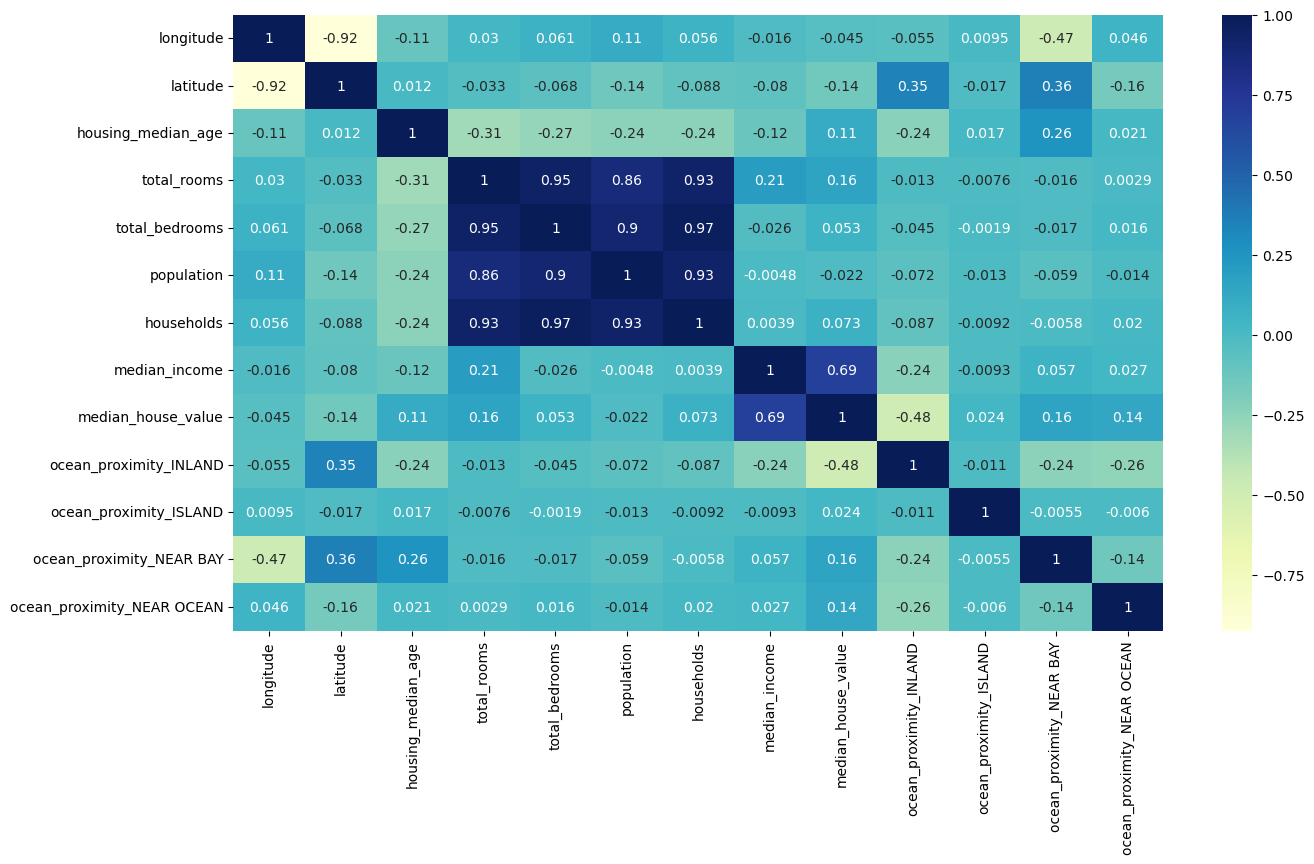

In [16]:
plt.figure(figsize=(15, 8))
sn.heatmap(df_enc.corr(), annot=True, cmap="YlGnBu");

Now if we look at the median house value column, it shows great correlation with house income

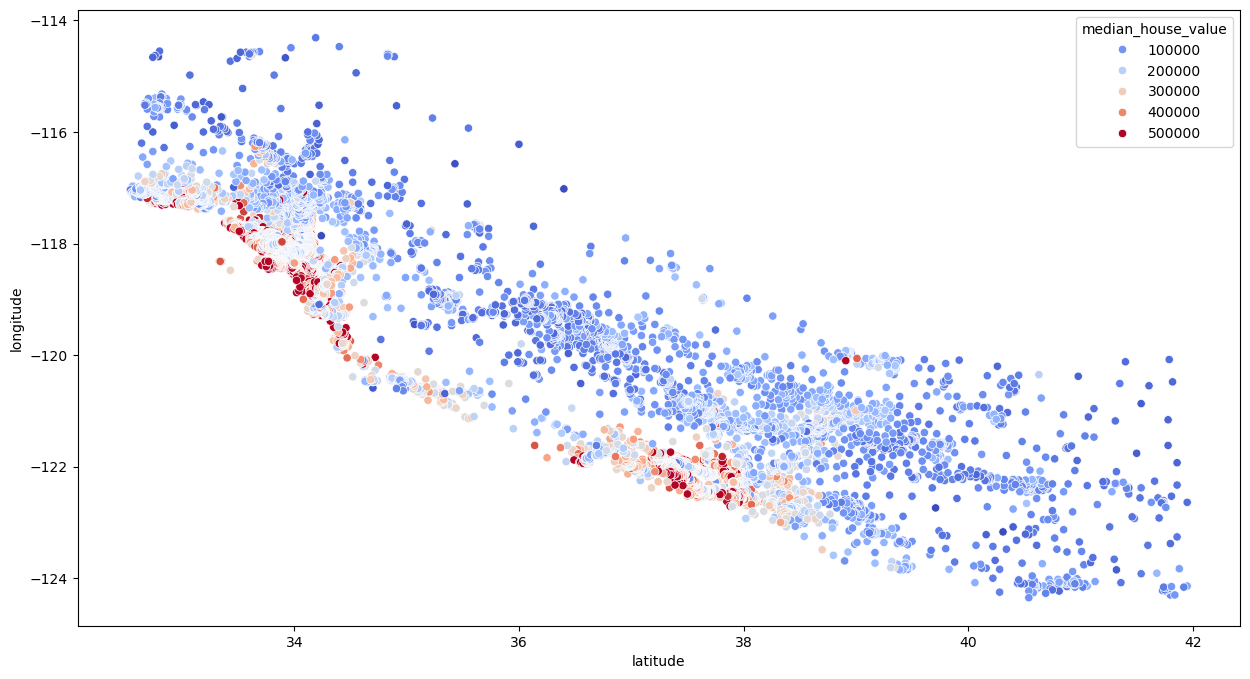

In [18]:
plt.figure(figsize=(15, 8))
sn.scatterplot(x='latitude', y='longitude', data=df_enc, hue='median_house_value', palette='coolwarm');

We can see that the ones closer to the coastline are more expensive than the ones inland. (Although not exactly a geographical map)

### Feature Engineering

Let's add some more useful features

In [22]:
df_enc['bedroom_ratio'] = df_enc['total_bedrooms']/df_enc['total_rooms']
df_enc['rooms_per_household'] = df_enc['total_rooms']/df['households']
df_enc['rooms_per_population'] = df_enc['total_rooms']/df['population']

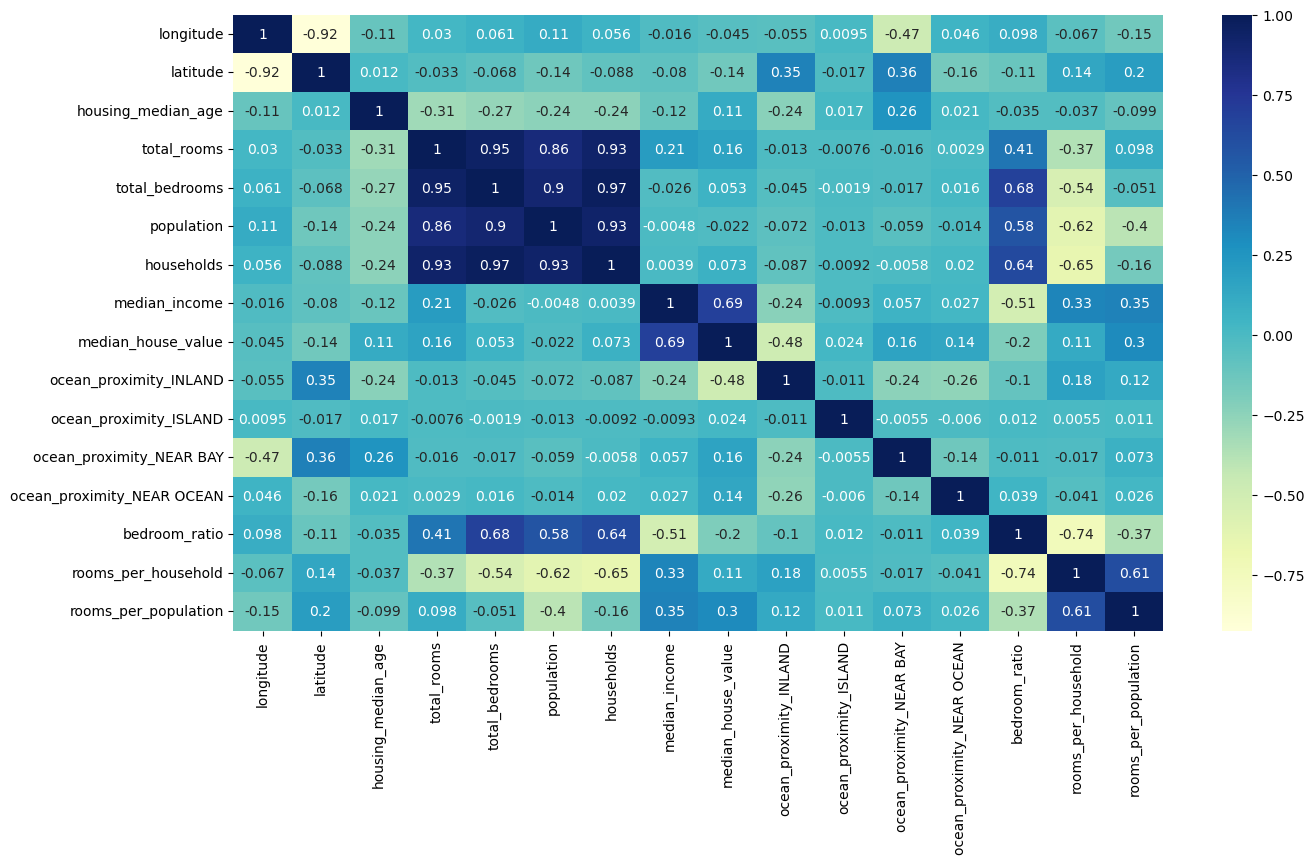

In [23]:
plt.figure(figsize=(15, 8))
sn.heatmap(df_enc.corr(), annot=True, cmap="YlGnBu");

### Model Training

#### Linear Regression

In [38]:
X = df_enc.drop(['median_house_value'], axis=1)
y = df_enc['median_house_value']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [52]:
reg.score(x_test, y_test)

0.6704060661189548

#### Scaled Linear Regression

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

reg_s = LinearRegression().fit(x_train_s, y_train_s)

score = reg_s.score(x_test_s, y_test_s)
print("Model Score:", score)

Model Score: 0.6704374889929031


#### Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor().fit(x_train, y_train)

In [87]:
rfr.score(x_test, y_test)

0.8198101444936777

In [88]:
rfr_s = RandomForestRegressor().fit(x_train_s, y_train)
rfr_s.score(x_test_s, y_test)

0.8065062832201655

### Grid Search

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 20],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
best_forest = grid_search.best_estimator_

In [92]:
best_forest.score(x_test_s, y_test)

0.7990161987810973